In [9]:
#Adapted from Diamond code below


"""
Create input data for kriging from CERES SSF1deg Terra data

Code for making kriging input data for 'Detection of large-scale cloud microphysical changes and evidence for decreasing cloud brightness within a major shipping corridor due to the 2020 International Maritime Organization marine fuel sulfur regulations'

Modifications
-------------
11 April 2023: Michael Diamond, Tallahassee, FL
    -Created
10 May 2023: Michael Diamond, Tallahassee, FL
    -Final form for ACP Letters initial submission
"""

#Import libraries
import numpy as np
import xarray as xr
from scipy import stats
from glob import glob
import os
import warnings

import matplotlib.pyplot as plt





In [13]:
import xarray as xr

filepath='/Users/micheltsamados/Downloads/'
# ds = xr.open_dataset(filepath+'20220303.S5P.TROPOMI.SO2.PGL.nc')
# print(ds)

#
###Load and manipulate SSF1deg data
#

#Load data
Terra = xr.open_dataset(filepath+'CERES_SSF1deg-Month_Terra-MODIS_Ed4.1_Subset_202001-202012.nc')
# Terra = xr.open_dataset(glob(dir_data+'CERES/SSF1deg/CERES_SSF1deg-Month_Terra-MODIS_Ed4.1_Subset_*.nc')[0])

#Calculate albedo, total cloud fraction, and overcast albedo
Terra['A'] = Terra['toa_sw_all_mon']/Terra['toa_solar_all_mon']

Terra['C'] = (Terra['cldarea_high_day_mon']+Terra['cldarea_mid_high_day_mon']+Terra['cldarea_mid_low_day_mon']+Terra['cldarea_low_day_mon'])/100

Terra['Acld'] = (Terra['A']-(1-Terra['C'])*.1)/Terra['C'] #Assumes Aclr = 0.1

Terra['Clow'] = Terra['cldarea_low_day_mon']/100

In [12]:
Terra

<xarray.Dataset>
Dimensions:                              (lon: 360, lat: 180, time: 13)
Coordinates:
  * lon                                  (lon) float32 0.5 1.5 ... 358.5 359.5
  * lat                                  (lat) float32 -89.5 -88.5 ... 88.5 89.5
  * time                                 (time) datetime64[ns] 2022-03-15 ......
Data variables: (12/286)
    toa_sw_all_mon                       (time, lat, lon) float32 ...
    toa_sw_clr_mon                       (time, lat, lon) float32 ...
    toa_lw_all_mon                       (time, lat, lon) float32 ...
    toa_lw_clr_mon                       (time, lat, lon) float32 ...
    toa_wn_all_mon                       (time, lat, lon) float32 ...
    toa_wn_clr_mon                       (time, lat, lon) float32 ...
    ...                                   ...
    aux_cld_mask_strong_mon              (time, lat, lon) float32 ...
    aux_cld_mask_weak_mon                (time, lat, lon) float32 ...
    A                                    (time, lat, lon) float32 0.7085 ... ...
    C                                    (time, lat, lon) float32 0.2699 ... ...
    Acld                                 (time, lat, lon) float32 2.355 ... 0...
    Clow                                 (time, lat, lon) float32 0.0 ... 0.411
Attributes:
    title:        CERES SSF1deg Products - Monthly Means
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:       
    version:      Edition4.1: Release Date July 10, 2020
    DOI:          10.5067/Terra/CERES/SSF1degMonth_L3.004A
    Fill_Value:   Fill Value is -999.0

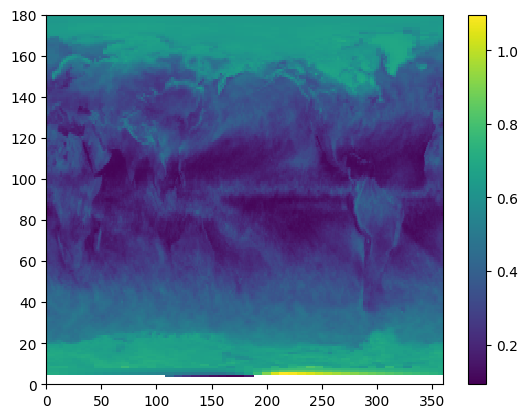

In [18]:
plt.pcolor(Terra['A'][3])
plt.colorbar()

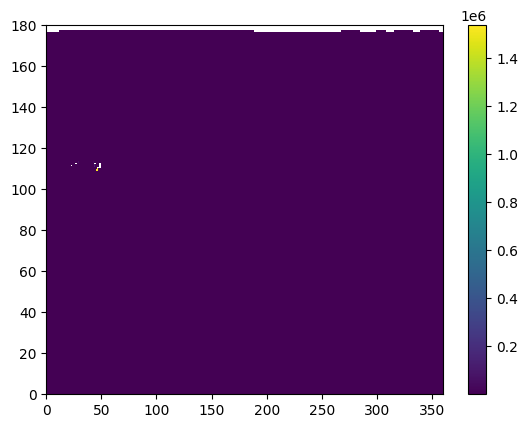

In [21]:
plt.pcolor(Terra['Acld'][9])
plt.colorbar()

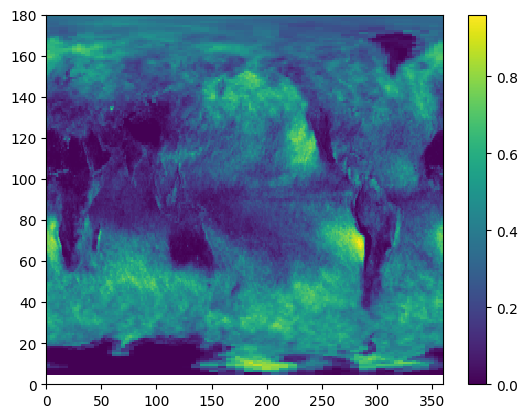

In [22]:
plt.pcolor(Terra['Clow'][3])
plt.colorbar()